In [2]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
from statistics import mean, pstdev
pd.set_option('display.max_rows', 800)

In [3]:
# ridge 7 data 
df = pd.read_csv('/Users/jannitta/Documents/GEOS350/Fall 2021/fwdprobe/garnet-big-boi-traverse.csv')
df.values
df.axes #axes: SiO2, Al2O3, TiO2, FeO, MgO, MnO, CaO, K2O, Na2O

[RangeIndex(start=0, stop=750, step=1),
 Index(['SiO2', 'Al2O3', 'TiO2', 'FeO', 'MgO', 'MnO', 'CaO', 'K2O', 'Na2O'], dtype='object')]

In [4]:
# Output #1: oxide sum dataframe

temp_OxSums = df.sum(axis=1)
OxSums = pd.DataFrame(data=temp_OxSums, columns = ['OxSums'], index=range(750))

OxSums

,OxSums
0,58.911615
1,23.429401
2,98.592896
3,99.748031
4,100.379735
5,100.574274
6,99.095202
7,99.390520
8,98.622237
9,99.788399


In [5]:
# Garnet function definitions
# Cations based on 12 Oxygens

catCols = ['Si', 'Al', 'Ti', 'Fe(2+)', 'Mg', 'Mn', 'Ca', 'K', 'Na', 'Total']

# SiO2, Al2O3, TiO2, FeO, MgO, MnO, CaO, K2O, Na2O

def grt(ox_df):
#  Convert to moles
    s1 = ox_df['SiO2'] / 60.0843 * 2
    s2 = ox_df['Al2O3'] / 101.9613 * 3
    s3 = ox_df['TiO2'] / 79.866 * 2
    s4 = ox_df['FeO'] / 71.844
    s5 = ox_df['MgO'] / 40.3044
    s6 = ox_df['MnO'] / 70.9374
    s7 = ox_df['CaO'] / 56.077
    s8 = ox_df['K2O'] / 94.196
    s9 = ox_df['Na2O'] / 61.9789
    molTotal = s1 + s2 + s3 + s4 + s5 + s6 + s7 + s8 + s9

    #  Normalize 
    r1 = (s1 * 12 / molTotal) / 2 #might eventually want to abstract # oxygens
    r2 = (s2 * 12 / molTotal) * 2 / 3
    r3 = (s3 * 12 / molTotal) / 2
    r4 = s4 * 12 / molTotal
    r5 = s5 * 12 / molTotal
    r6 = s6 * 12 / molTotal
    r7 = s7 * 12 / molTotal
    r8 = (s8 * 12 / molTotal) * 2
    r9 = (s9 * 12 / molTotal) * 2    
    total = r1 + r2 + r3 + r4 + r5 + r6 + r7 + r8 + r9

    #     make a list and append to larger list 
    ox_list.append([r1, r2, r3, r4, r5, r6, r7, r8, r9, total])

In [6]:
# Output #2: cations dataframe

# iterate over data frame and call garnet function

ox_list = []

for row in df.T.iteritems():
    grt(row[1])

# output into data frame 
cat_df = pd.DataFrame(ox_list)
cat_df.columns = catCols

cat_df

,Si,Al,Ti,Fe(2+),Mg,Mn,Ca,K,Na,Total
0,1.594775,2.450244,3.582391e-02,4.928286,0.059878,1.283104e-02,0.019778,0.045977,0.039349,9.186942
1,1.962958,2.459439,6.551986e-02,2.760192,0.719946,3.917770e-02,0.250973,0.176357,0.790839,9.225401
2,2.901444,2.052353,9.032054e-04,2.355410,0.494557,9.426647e-02,0.169263,0.004081,0.002478,8.074755
3,2.919781,2.045198,1.218829e-03,2.347254,0.492220,9.707397e-02,0.150104,0.001565,0.005537,8.059952
4,2.949321,2.025748,1.047355e-03,2.318299,0.493520,9.773503e-02,0.150117,0.001658,0.000284,8.037729
5,2.946783,2.028626,1.415302e-03,2.315030,0.494141,9.878399e-02,0.150935,0.001139,0.002410,8.039262
6,2.896037,2.064199,2.850990e-04,2.346483,0.513938,9.890671e-02,0.150381,0.000308,0.002389,8.072927
7,2.900748,2.066228,1.700283e-03,2.332255,0.512463,9.480931e-02,0.154053,0.001100,0.003265,8.066621
8,2.917221,2.073486,1.408470e-03,2.291411,0.508582,9.945182e-02,0.150981,0.000653,0.003517,8.046712
9,2.903237,2.056909,1.766691e-03,2.333325,0.524003,9.976130e-02,0.147267,0.000001,0.000547,8.066817


In [7]:
# Find avg and stdev of cations

print("Mean:")
print(cat_df.mean())

print ("\nStandard deviation:")
print(cat_df.std())

Mean:
Si        3.013092
Al        2.048680
Ti        0.002012
Fe(2+)    2.064821
Mg        0.540026
Mn        0.095530
Ca        0.161143
K         0.019979
Na        0.050523
Total     7.995806
dtype: float64

Standard deviation:
Si        0.254886
Al        0.142223
Ti        0.007508
Fe(2+)    0.540730
Mg        0.198551
Mn        0.034234
Ca        0.093183
K         0.110400
Na        0.198583
Total     0.177526
dtype: float64


In [8]:
# Output #3: solve for XFe, XMg, XMn, and XCa

XFe_list = []
XMg_list = []
XMn_list = []
XCa_list = []
Fe_Mg_list = []

for row in cat_df.T.iteritems():
    s = row[1]
    Fe = s['Fe(2+)']
    Mg = s['Mg']
    Mn = s['Mn']
    Ca = s['Ca']
    
    XFe = Fe/(Fe + Mg + Mn + Ca)
    XMg = Mg/(Fe + Mg + Mn + Ca)
    XMn = Mn/(Fe + Mg + Mn + Ca)
    XCa = Ca/(Fe + Mg + Mn + Ca)
    Fe_Mg = Fe/(Fe+Mg)
    
    XFe_list.append(XFe)
    XMg_list.append(XMg)
    XMn_list.append(XMn)
    XCa_list.append(XCa)
    Fe_Mg_list.append(Fe_Mg)
    

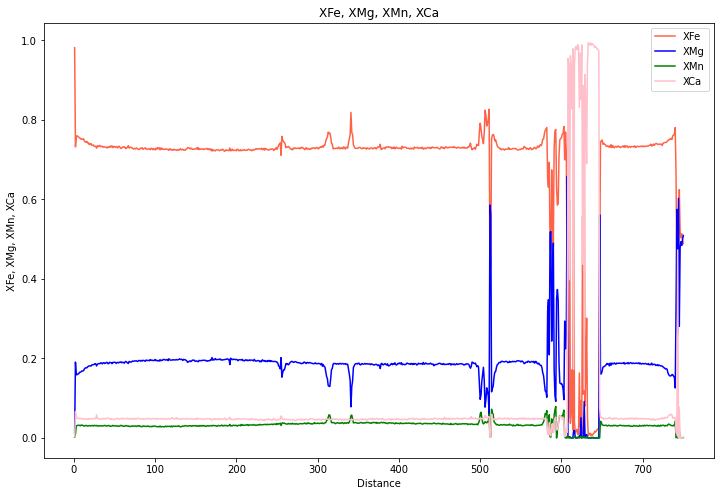

In [29]:
# Plot XFe, XMg, XMn, XCa

distance = list(range(1, len(XFe_list)+1))

plt.figure(figsize=(12, 8))
plt.plot(distance, XFe_list, label='XFe', c = "tomato")
plt.plot(distance, XMg_list, label='XMg', c = "blue")
plt.plot(distance, XMn_list, label='XMn', c = "green")
plt.plot(distance, XCa_list, label='XCa', c = "pink")

plt.legend(loc='best')
plt.title("XFe, XMg, XMn, XCa")
plt.xlabel("Distance")
plt.ylabel("XFe, XMg, XMn, XCa")

plt.show()

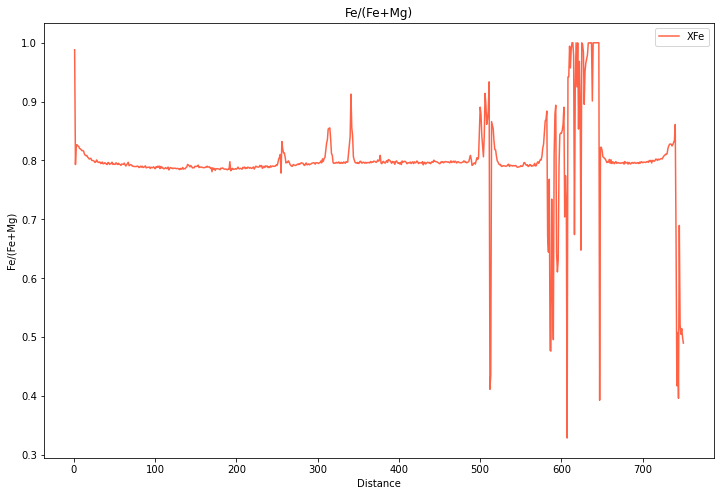

In [32]:
# Plot Fe/(Fe+Mg)

plt.figure(figsize=(12, 8))
plt.plot(distance, Fe_Mg_list, label='XFe', c = "tomato")

plt.legend(loc='best')
plt.title("Fe/(Fe+Mg)")
plt.xlabel("Distance")
plt.ylabel("Fe/(Fe+Mg)")

plt.show()

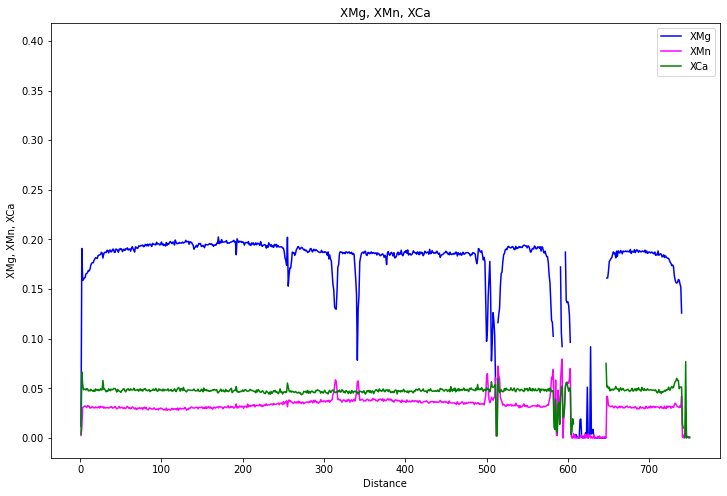

In [30]:
# filter Mg, Mn, Ca

XCa_list_filt = [x if x <= 0.4 else None for x in XCa_list]
XMg_list_filt = [x if x <= 0.25 else None for x in XMg_list]
XMn_list_filt = [x if x <= 0.4 else None for x in XMn_list]


plt.figure(figsize=(12, 8))
plt.plot(distance, XMg_list_filt, label='XMg', c = "blue")
plt.plot(distance, XMn_list_filt, label='XMn', c = "magenta")
plt.plot(distance, XCa_list_filt, label='XCa', c = "green")

plt.legend(loc='best')
plt.title("XMg, XMn, XCa")
plt.xlabel("Distance")
plt.ylabel("XMg, XMn, XCa")

plt.show()

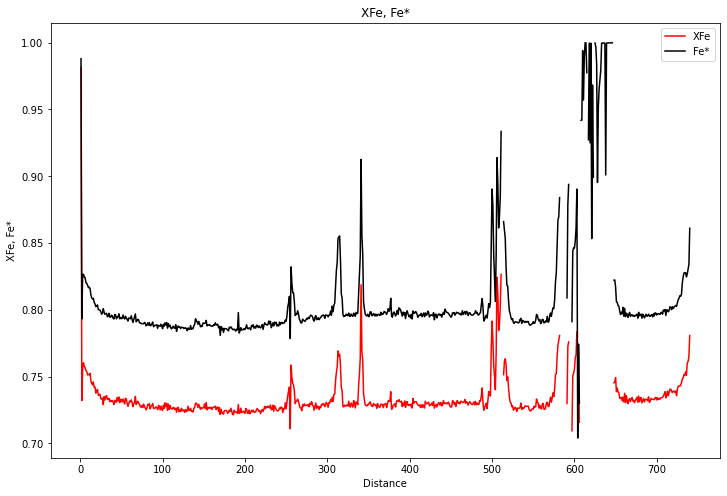

In [31]:
# filter , Fe*

XFe_list_filt = [x if x >= 0.7 else None for x in XFe_list]
XFe_Mg_list_filt = [x if x >= 0.7 else None for x in Fe_Mg_list]


plt.figure(figsize=(12, 8))
plt.plot(distance, XFe_list_filt, label='XFe', c = "red")
plt.plot(distance, XFe_Mg_list_filt, label='Fe*', c = "black")

plt.legend(loc='best')
plt.title("XFe, Fe*")
plt.xlabel("Distance")
plt.ylabel("XFe, Fe*")

plt.show()

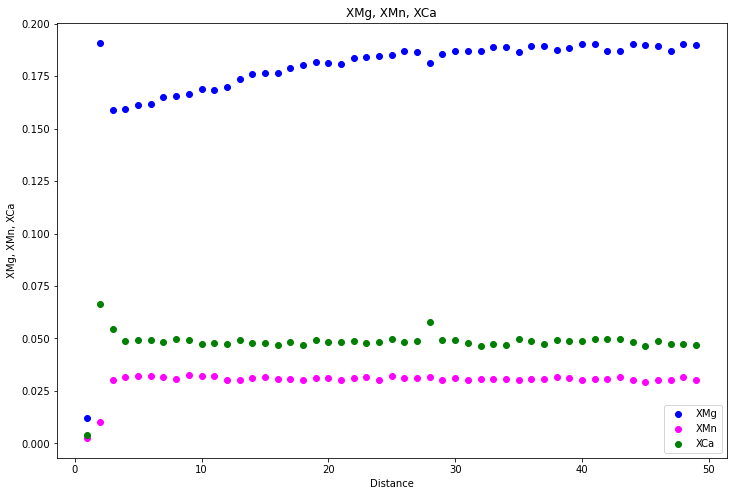

In [38]:
# first 50 Mg, Mn, Ca

plt.figure(figsize=(12, 8))
plt.scatter(distance[0:49], XMg_list_filt[0:49], label='XMg', c = "blue")
plt.scatter(distance[0:49], XMn_list_filt[0:49], label='XMn', c = "magenta")
plt.scatter(distance[0:49], XCa_list_filt[0:49], label='XCa', c = "green")

# plt.plot(distance[700:749], XMg_list_filt[700:749], label='XMg', c = "blue")


plt.legend(loc='best')
plt.title("[0:49] XMg, XMn, XCa")
plt.xlabel("Distance")
plt.ylabel("XMg, XMn, XCa")

plt.show()

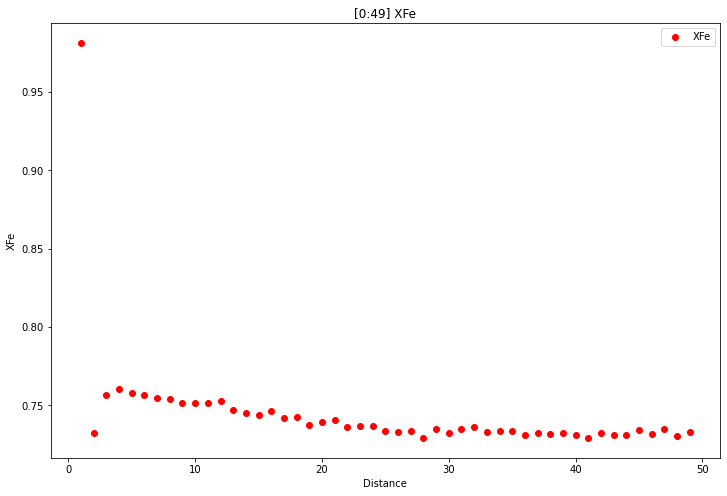

In [39]:
# first Fe

plt.figure(figsize=(12, 8))
plt.scatter(distance[0:49], XFe_list_filt[0:49], label='XFe', c = "red")


plt.legend(loc='best')
plt.title("[0:49] XFe")
plt.xlabel("Distance")
plt.ylabel("XFe")

plt.show()


In [60]:
# [0:50] dataframe

filt_lists = []
filt_lists.append([x*10 for x in list(range(0,50))])
filt_lists.append(XMg_list_filt[0:50])
filt_lists.append(XMn_list_filt[0:50])
filt_lists.append(XCa_list_filt[0:50])
filt_lists.append(XFe_list_filt[0:50])
filt_lists.append(XFe_Mg_list_filt[0:50])

filt_df = pd.DataFrame(filt_lists).T
filt_df.columns = ['Step','XMg', 'XMn', 'XCa', 'XFe', 'Fe*']

filt_df

,Step,XMg,XMn,XCa,XFe,Fe*
0,0.0,0.011926,0.002556,0.003939,0.981579,0.987996
1,10.0,0.190953,0.010391,0.066566,0.732090,0.793127
2,20.0,0.158843,0.030277,0.054364,0.756516,0.826469
3,30.0,0.159467,0.031450,0.048630,0.760453,0.826651
4,40.0,0.161298,0.031943,0.049063,0.757695,0.824484
5,50.0,0.161543,0.032294,0.049343,0.756820,0.824097
6,60.0,0.165269,0.031806,0.048358,0.754567,0.820328
7,70.0,0.165654,0.030647,0.049798,0.753902,0.819855
8,80.0,0.166725,0.032603,0.049495,0.751178,0.818363
9,90.0,0.168796,0.032136,0.047439,0.751629,0.816611


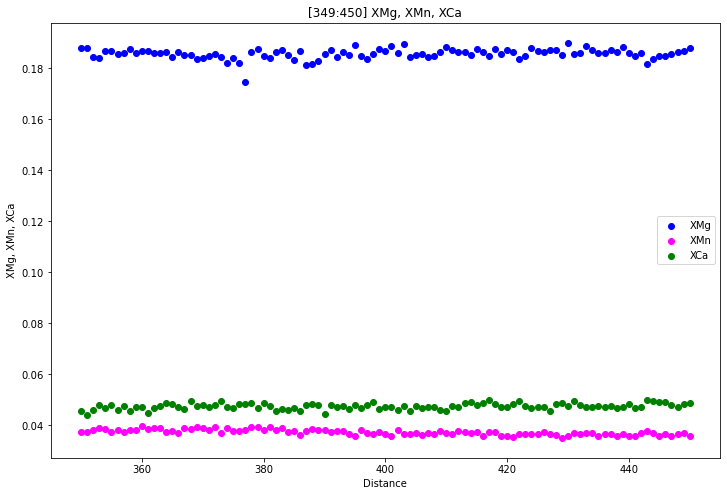

In [61]:
# core XMg, XMn, XCa

plt.figure(figsize=(12, 8))
plt.scatter(distance[349:450], XMg_list_filt[349:450], label='XMg', c = "blue")
plt.scatter(distance[349:450], XMn_list_filt[349:450], label='XMn', c = "magenta")
plt.scatter(distance[349:450], XCa_list_filt[349:450], label='XCa', c = "green")

# plt.plot(distance[700:749], XMg_list_filt[700:749], label='XMg', c = "blue")


plt.legend(loc='best')
plt.title("[349:450] XMg, XMn, XCa")
plt.xlabel("Distance")
plt.ylabel("XMg, XMn, XCa")

plt.show()

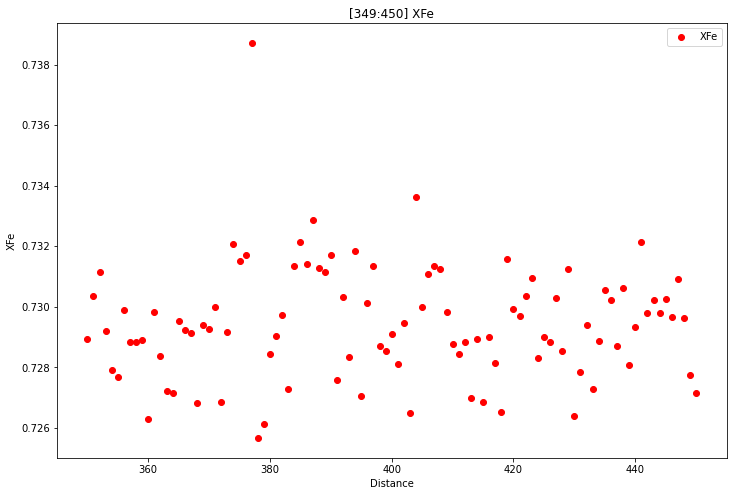

In [62]:
# core Fe

plt.figure(figsize=(12, 8))
plt.scatter(distance[349:450], XFe_list_filt[349:450], label='XFe', c = "red")


plt.legend(loc='best')
plt.title("[349:450] XFe")
plt.xlabel("Distance")
plt.ylabel("XFe")

plt.show()


In [63]:
# [349:450] dataframe

filt_lists = []
filt_lists.append([x*10 for x in list(range(349,450))])
filt_lists.append(XMg_list_filt[349:450])
filt_lists.append(XMn_list_filt[349:450])
filt_lists.append(XCa_list_filt[349:450])
filt_lists.append(XFe_list_filt[349:450])
filt_lists.append(XFe_Mg_list_filt[349:450])

core_filt_df = pd.DataFrame(filt_lists).T
core_filt_df.columns = ['Step','XMg', 'XMn', 'XCa', 'XFe', 'Fe*']

core_filt_df

,Step,XMg,XMn,XCa,XFe,Fe*
0,3490.0,0.188032,0.037425,0.045622,0.728921,0.794938
1,3500.0,0.188088,0.037314,0.044228,0.730370,0.795213
2,3510.0,0.184588,0.038340,0.045913,0.731160,0.798429
3,3520.0,0.183919,0.039105,0.047777,0.729200,0.798582
4,3530.0,0.186774,0.038709,0.046594,0.727923,0.795808
5,3540.0,0.186900,0.037465,0.047954,0.727681,0.795644
6,3550.0,0.185728,0.038280,0.046087,0.729904,0.797158
7,3560.0,0.186007,0.037484,0.047660,0.728848,0.796681
8,3570.0,0.187482,0.038093,0.045590,0.728835,0.795396
9,3580.0,0.185872,0.038021,0.047191,0.728916,0.796814


In [11]:
# Avg and stdev of XFe, XMg, XMn, XCa, and Fe/(Fe+Mg)

print("XFe Mean:")
print(mean(XFe_list))

print ("\nXFe Standard deviation:")
print(pstdev(XFe_list))

print("\nXMg Mean:")
print(mean(XMg_list))

print ("\nXMg Standard deviation:")
print(pstdev(XMg_list))

print("\nXMn Mean:")
print(mean(XMn_list))

print ("\nXMn Standard deviation:")
print(pstdev(XMn_list))

print("\nXCa Mean:")
print(mean(XCa_list))

print ("\nXCa Standard deviation:")
print(pstdev(XCa_list))

print("\nFe/(Fe+Mg) Mean:")
print(mean(Fe_Mg_list))

print ("\nFe/(Fe+Mg) Standard deviation:")
print(pstdev(Fe_Mg_list))


XFe Mean:
0.6940341154144728

XFe Standard deviation:
0.15124655211824037

XMg Mean:
0.1834155302679831

XMg Standard deviation:
0.0685692987552174

XMn Mean:
0.031830820262695445

XMn Standard deviation:
0.01093118415323351

XCa Mean:
0.09071953405484866

XCa Standard deviation:
0.1918456735903764

Fe/(Fe+Mg) Mean:
0.7990019345761467

Fe/(Fe+Mg) Standard deviation:
0.06834763365322064
